In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the batch size and image size
batch_size = 32
img_size = (224, 224)

In [ ]:
# Define your custom dataset directory
train_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
validation_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Create the data generators for train/validation/test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Load the pre-trained VGG16 model without the top layer
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Freeze all the layers in the pre-trained model
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# Add the top layers for the custom classification task
x = Flatten()(vgg19.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
# Create the custom model
model = Model(inputs=vgg19.input, outputs=predictions)

In [ ]:
# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

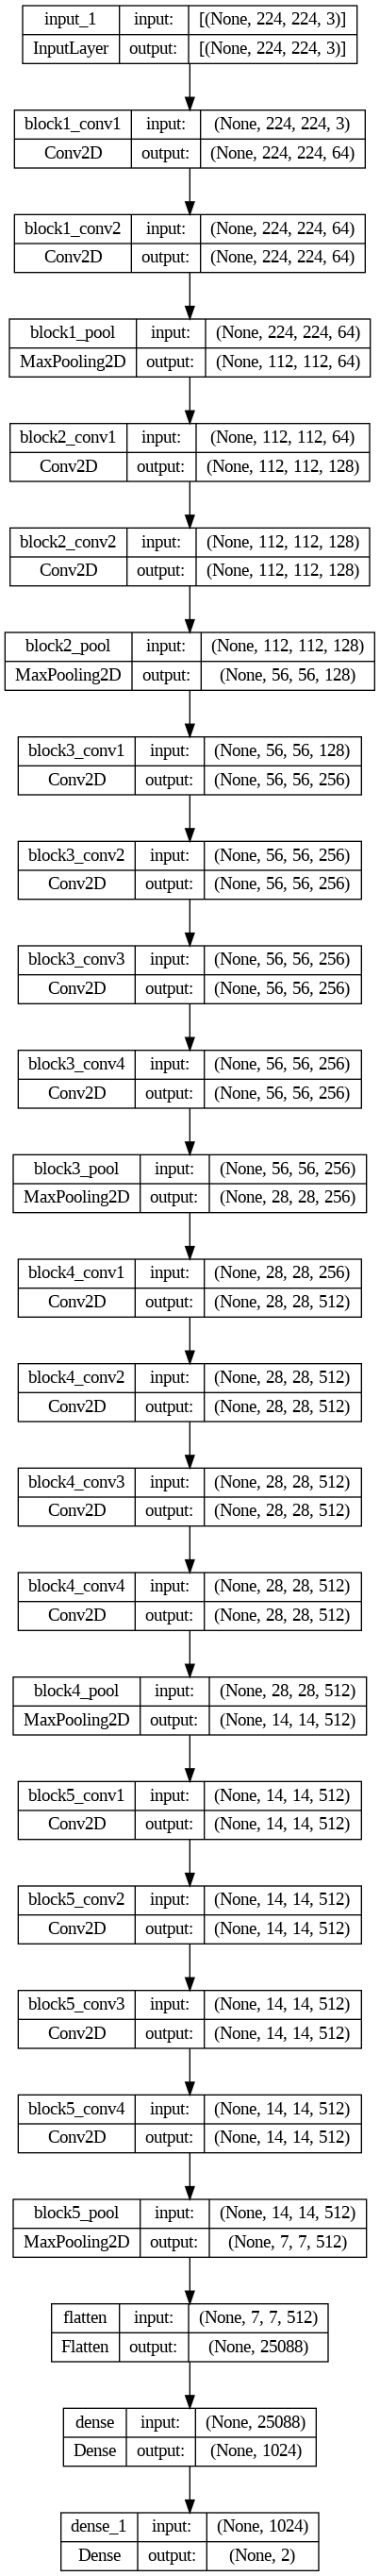

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 17.1 MB/s eta 0:00:00


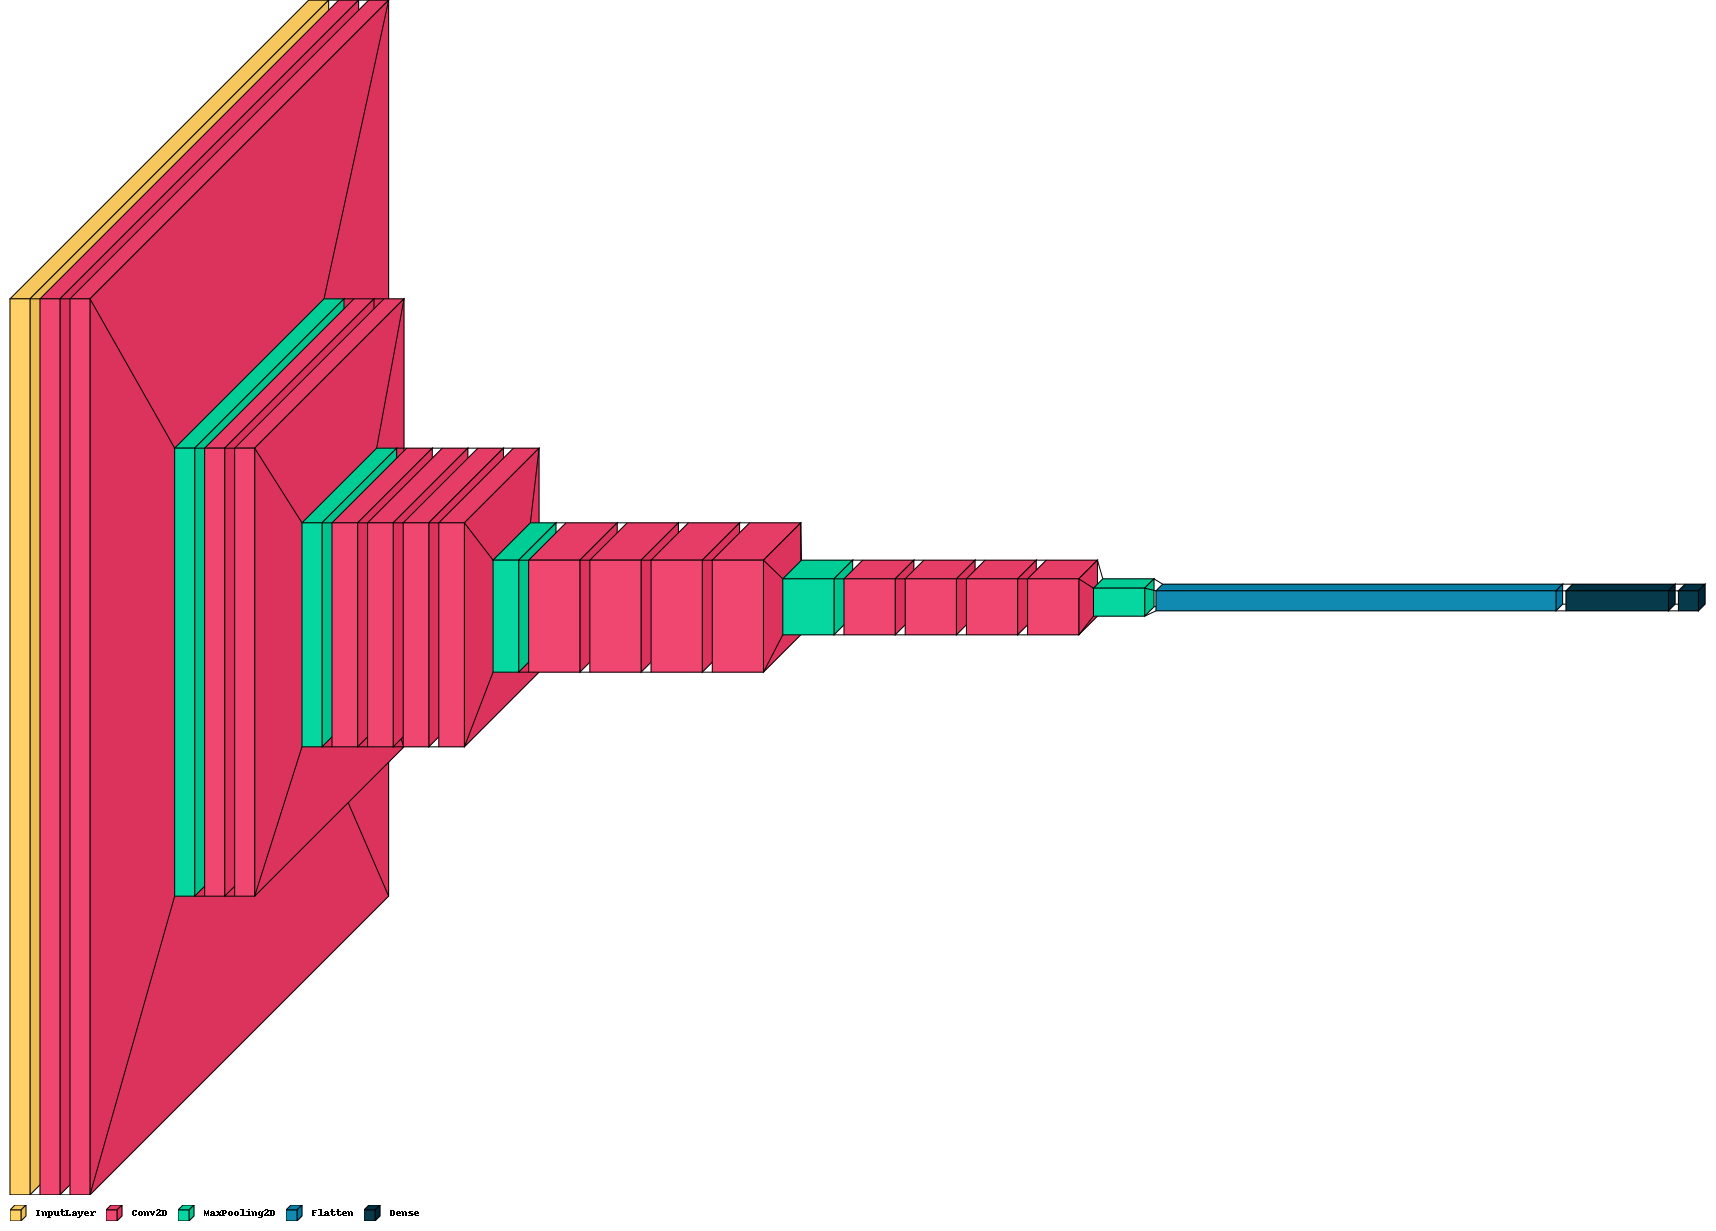

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
#visualkeras.layered_view(model1, scale_xy=5, scale_z=5, max_z=5, legend=True)
visualkeras.layered_view(model1, legend=True)

In [ ]:
# Train the model with the train and validation generators
num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
27/27 [==============================] - 361s 13s/step - loss: 4.8075 - accuracy: 0.5369 - val_loss: 0.6543 - val_accuracy: 0.6056
Epoch 2/10
27/27 [==============================] - 63s 2s/step - loss: 0.5230 - accuracy: 0.7369 - val_loss: 0.5511 - val_accuracy: 0.7167
Epoch 3/10
27/27 [==============================] - 63s 2s/step - loss: 0.3460 - accuracy: 0.8655 - val_loss: 0.5116 - val_accuracy: 0.7611
Epoch 4/10
27/27 [==============================] - 63s 2s/step - loss: 0.2645 - accuracy: 0.9095 - val_loss: 0.5367 - val_accuracy: 0.7500
Epoch 5/10
27/27 [==============================] - 68s 3s/step - loss: 0.1928 - accuracy: 0.9429 - val_loss: 0.5421 - val_accuracy: 0.7444
Epoch 6/10
27/27 [==============================] - 63s 2s/step - loss: 0.1376 - accuracy: 0.9750 - val_loss: 0.6807 - val_accuracy: 0.7056
Epoch 7/10
27/27 [==============================] - 63s 2s/step - loss: 0.0917 - accuracy: 0.9893 - val_loss: 0.6830 - val_accuracy: 0.7167
Epoch 8/10
27/27 [

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_generator)

6/6 [==============================] - 125s 25s/step - loss: 0.4710 - accuracy: 0.7889


[0.4710281491279602, 0.7888888716697693]

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation Loss:', validation_loss)
print('Validation Accuracy:', validation_acc)

6/6 [==============================] - 6s 925ms/step - loss: 0.7377 - accuracy: 0.7222
Validation Loss: 0.7377400994300842
Validation Accuracy: 0.7222222089767456


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

6/6 [==============================] - 5s 786ms/step - loss: 0.4710 - accuracy: 0.7889
Test Loss: 0.47102826833724976
Test Accuracy: 0.7888888716697693


In [ ]:
# Save the model
#model.save('vgg19_custom.h5')

In [ ]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model(checkpoint_filepath)
test_loss, test_acc = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')